# LLM Price Comparison

A comparison of the price per million tokens and benchmark scores of various large language models.

Google Gemini Pro has been adjusted from a per-character price to a per-token estimate by simply multiplying by four.

## Benchmark

The benchmark used is the [DROP](https://allenai.org/data/drop) benchmark, which measures the ability of a model to reason over text, as reported by Anthropic: https://twitter.com/AnthropicAI/status/1764653830468428150?t=PVCce7q9pT-aiwsUd1w9tg&s=19

The GPT-4 Turbo DROP benchmark came from this post: https://bito.ai/blog/gemini-1-5-pro-vs-gpt-4-turbo-benchmarks/


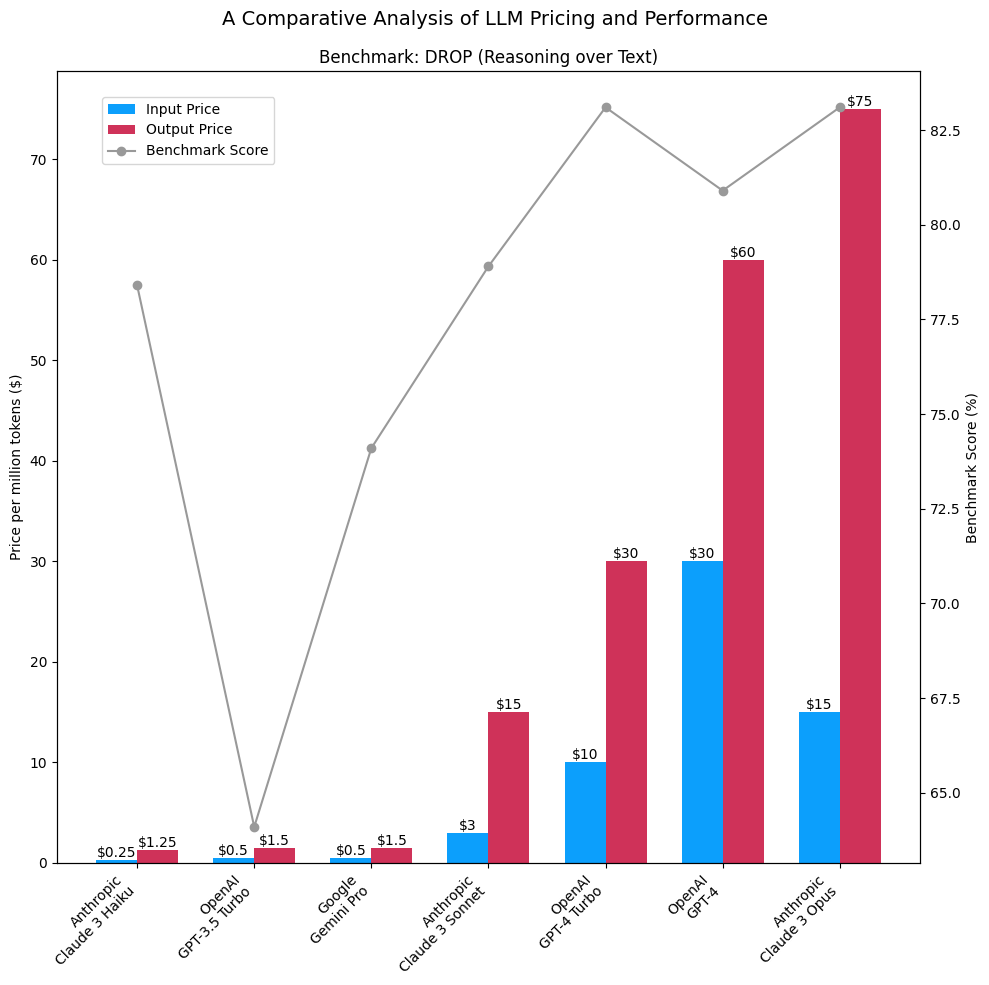

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    'Anthropic\nClaude 3 Haiku',
    'OpenAI\nGPT-3.5 Turbo',
    'Google\nGemini Pro',
    'Anthropic\nClaude 3 Sonnet',
    'OpenAI\nGPT-4 Turbo',
    'OpenAI\nGPT-4',
    'Anthropic\nClaude 3 Opus'
]

# Prices from Google are per-character, not per-token.  And they're per thousand, not per million.
# input: $0.000125 / 1K characters
# output: $0.000375 / 1K characters
gemini_pro_input_per_thousand_characters = 0.000125
gemini_pro_output_per_thousand_characters = 0.000375
gemini_pro_input_per_million_tokens = gemini_pro_input_per_thousand_characters * 1000 * 4
gemini_pro_output_per_million_tokens = gemini_pro_output_per_thousand_characters * 1000 * 4

# Prices per million tokens
input_prices = [
    0.25,  # Haiku
    0.50,  # GPT-3.5 Turbo
    gemini_pro_input_per_million_tokens,
    3,     # Sonnet
    10,    # GPT-4 Turbo
    30,    # GPT-4
    15     # Opus
]

output_prices = [
    1.25,  # Haiku
    1.50,  # GPT-3.5 Turbo
    gemini_pro_output_per_million_tokens,
    15,    # Sonnet
    30,    # GPT-4 Turbo
    60,    # GPT-4
    75     # Opus
]

# Benchmark scores for "Reasoning over text" (adjust or add as needed)
benchmark_scores = [
    78.4,  # Haiku
    64.1,  # GPT-3.5 Turbo
    74.1,  # Gemini Pro
    78.9,  # Sonnet
    83.1,  # GPT-4 Turbo
    80.9,  # GPT-4
    83.1   # Opus
]

# Setting up the plot
fig, ax1 = plt.subplots(figsize=(10, 10))

# Positions of bars
positions = np.arange(len(models))

# Plotting input and output prices
width = 0.35  # Width of the bars
input_bars = ax1.bar(positions - width/2, input_prices, width, label='Input Price', color='#0C9FFC')
output_bars = ax1.bar(positions + width/2, output_prices, width, label='Output Price', color='#CF3259')

# Adding price labels above bars
for bars, prices in zip([input_bars, output_bars], [input_prices, output_prices]):
    for bar, price in zip(bars, prices):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${price}', 
                 ha='center', va='bottom')

# Creating a second y-axis for benchmark scores
ax2 = ax1.twinx()
ax2.plot(positions, benchmark_scores, 'o-', color='#999999', label='Benchmark Score')

# Setting labels and legends
# ax1.set_xlabel('Model')
fig.suptitle('A Comparative Analysis of LLM Pricing and Performance', fontsize=14)
ax1.set_title('Benchmark: DROP (Reasoning over Text)')
ax1.set_ylabel('Price per million tokens ($)')
ax2.set_ylabel('Benchmark Score (%)')
ax1.set_xticks(positions)
ax1.set_xticklabels(models, rotation=45, ha='right')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout(rect=[0, 0, 1, 0.99])

fig.savefig('Comparative_Analysis_of_LLM_Pricing_and_Performance_Benchmark_DROP_Reasoning_Over_Text.png', format='png')


plt.show()
